In [1]:
import pandas as pd
df = pd.read_csv('Airbnb_Open_Data.csv')


C:\Users\juan_\AppData\Local\Temp\ipykernel_25092\211159766.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [2]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [3]:
#Deleting duplicate Data
df = df.drop_duplicates()

In [4]:
#Understanding the Data
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [5]:
#Understanding the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_policy  

In [6]:
#Dropping unnecessary columns
#Country and country code has only one values: US and United States respectively
#Instant_bookable has only TRUE and False, unnecessary
#License has only two rows with one value
df = df.drop(columns = ['license','house_rules','country code','country','instant_bookable','NAME','last review','host name'])

In [7]:
#fill Na values using mean method
df.fillna(df[['reviews per month','review rate number','calculated host listings count','availability 365','number of reviews']].mean(), inplace = True)

In [8]:
#Dropping Na values from 'service fee'
df['service fee'] = df['service fee'].fillna('DELETE')
df.drop(df[df['service fee'] == 'DELETE'].index, inplace=True)

In [9]:
#Fill minimum nights column using mode method
df['minimum nights'].fillna(df['minimum nights'].mode()[0], inplace=True)

C:\Users\juan_\AppData\Local\Temp\ipykernel_25092\3696851904.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['minimum nights'].fillna(df['minimum nights'].mode()[0], inplace=True)


In [10]:
#Eliminate $ sign to change data type to float on columns 'price' and 'Service price'
df['price'] = df['price'].str.strip('$')
df['service fee'] = df['service fee'].str.strip('$')
df['price'] = df['price'].str.replace(',', '')
df['service fee'] = df['service fee'].str.replace(',', '')


In [11]:
#Change datatype
df['price'] = df['price'].astype(float)

In [12]:
#Set values on columns 'price' and 'service fee' using mean method
df['price'] = df['price'].fillna(df['price'].mean())

In [13]:
#Identify null values in Neighbourhood group column
df[df['neighbourhood group'].isnull()]


,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
74,1042206,98195975718,NaN,NaN,Washington Heights,40.83139,-73.94095,moderate,Private room,2011.0,571.000000,114,2.0,49.0,1.600000,2.000000,2.0,141.043992
75,1042759,4726877402,unconfirmed,NaN,Clinton Hill,40.68346,-73.96374,strict,Private room,2014.0,398.000000,80,2.0,105.0,0.920000,1.000000,1.0,141.043992
76,1043311,74322993447,verified,NaN,East Village,40.72828,-73.98801,strict,Entire home/apt,2018.0,618.000000,124,5.0,21.0,0.200000,4.000000,1.0,141.043992
77,1043863,11468499446,verified,NaN,Upper East Side,40.76865,-73.95058,strict,Private room,2007.0,116.000000,23,1.0,142.0,1.500000,4.000000,1.0,141.043992
78,1044415,68599531533,unconfirmed,NaN,Woodside,40.75038,-73.90334,flexible,Private room,2012.0,54.000000,11,30.0,25.0,0.220000,2.000000,1.0,141.043992
90,1051043,14067827221,unconfirmed,NaN,Williamsburg,40.71156,-73.96218,moderate,Private room,2015.0,266.000000,53,3.0,174.0,1.540000,5.000000,4.0,141.043992
91,1051595,12884105458,NaN,NaN,Bushwick,40.70032,-73.93830,moderate,Private room,2012.0,728.000000,146,4.0,24.0,0.280000,5.000000,1.0,141.043992
92,1052148,63218812094,unconfirmed,NaN,Prospect Heights,40.68233,-73.97261,flexible,Entire home/apt,2021.0,583.000000,117,4.0,166.0,3.400000,2.000000,1.0,141.043992
148,1083076,83696952551,verified,NaN,East Village,40.72354,-73.98295,strict,Entire home/apt,2003.0,625.249921,119,3.0,30.0,0.280000,5.000000,1.0,344.000000
161,1090256,1595619477,unconfirmed,NaN,Williamsburg,40.71088,-73.95055,NaN,Private room,2022.0,1020.000000,204,4.0,202.0,1.860000,5.000000,2.0,377.000000


In [14]:
#set values on blanket spaces
df.loc[df['neighbourhood'] == 'Washington Heights', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Clinton Hill', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'East Village', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Upper East Side', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Woodside', 'neighbourhood group'] = 'Queens'
df.loc[df['neighbourhood'] == 'Williamsburg', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'Bushwick', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'Prospect Heights', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'Chelsea', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'East Harlem', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Eastchester', 'neighbourhood group'] = 'Bronx'
df.loc[df['neighbourhood'] == 'Harlem', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Chinatown', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Queens Village', 'neighbourhood group'] = 'Queens'
df.loc[df['neighbourhood'] == 'Bedford-Stuyvesant', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'Upper West Side', 'neighbourhood group'] = 'Manhattan'


In [15]:
#filling blanket spaces in 'host_identity_verified' column with 'Unconfirmed'
df['host_identity_verified'].fillna('unconfirmed', inplace =True)

C:\Users\juan_\AppData\Local\Temp\ipykernel_25092\1530849613.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_identity_verified'].fillna('unconfirmed', inplace =True)


In [16]:
#Droping na value from 'Construction year' and 'neighbourhood' columns
df['neighbourhood'] = df['neighbourhood'].fillna('DELETE')
df.drop(df[df['neighbourhood'] == 'DELETE'].index, inplace=True)
df['Construction year'] = df['Construction year'].fillna('DELETE')
df.drop(df[df['Construction year'] == 'DELETE'].index, inplace=True)


In [17]:
#Deleting Na values from 'lat' and 'long' columns
df['lat'] = df['lat'].fillna('DELETE')
df['long'] = df['long'].fillna('DELETE')
df.drop(df[df['lat'] == 'DELETE'].index, inplace=True)
df.drop(df[df['long'] == 'DELETE'].index, inplace=True)


In [18]:
#Fill 'cancellation_policy' column using mode method
df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0], inplace=True)

C:\Users\juan_\AppData\Local\Temp\ipykernel_25092\2605783793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0], inplace=True)


In [19]:
df['neighbourhood group']=df['neighbourhood group'].replace('brookln','Brooklyn')

In [20]:
df.isnull().sum()

id                                0
host id                           0
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [21]:
df

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,strict,Private room,2020.0,966.0,193,10.0,9.0,0.210000,4.0,6.0,286.0
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,moderate,Entire home/apt,2007.0,142.0,28,30.0,45.0,0.380000,4.0,2.0,228.0
2,1002403,78829239556,unconfirmed,Manhattan,Harlem,40.80902,-73.9419,flexible,Private room,2005.0,620.0,124,3.0,0.0,1.375408,5.0,1.0,352.0
3,1002755,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,moderate,Entire home/apt,2005.0,368.0,74,30.0,270.0,4.640000,4.0,1.0,322.0
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,moderate,Entire home/apt,2009.0,204.0,41,10.0,9.0,0.100000,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102040,57358028,56457739998,verified,Queens,East Elmhurst,40.76245,-73.87938,strict,Private room,2022.0,982.0,196,1.0,239.0,8.580000,2.0,2.0,361.0
102041,57358580,60176837202,verified,Queens,Edgemere,40.5938,-73.77373,moderate,Private room,2020.0,946.0,189,1.0,76.0,2.840000,1.0,1.0,324.0
102042,57359133,68411243647,verified,Manhattan,Upper West Side,40.79712,-73.96117,strict,Private room,2012.0,706.0,141,1.0,4.0,0.140000,4.0,1.0,0.0
102043,57359685,95625271612,verified,Manhattan,SoHo,40.72318,-74.00223,flexible,Entire home/apt,2020.0,1043.0,209,2.0,21.0,0.740000,4.0,2.0,343.0


In [22]:
df.to_csv('Data.csv', index=False)

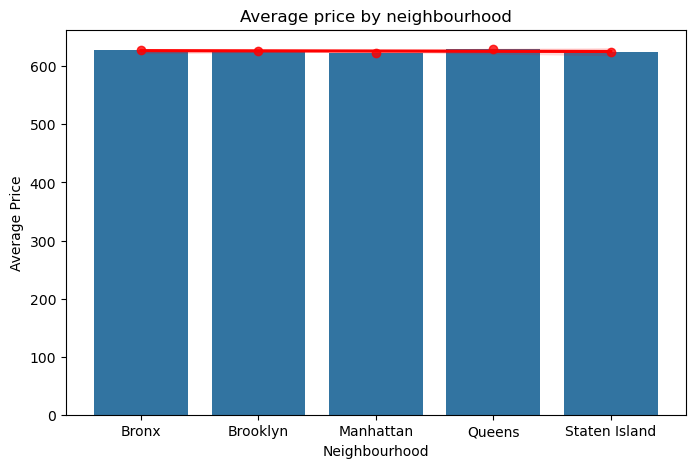

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#grouping the data by neighbourhood, group with value 'price'
df_groupby = df.groupby('neighbourhood group')['price'].mean().reset_index()



#creating a bar chart
plt.figure(figsize = (8, 5))
sns.barplot(x = 'neighbourhood group', y = 'price', data = df_groupby)

#trend line
sns.regplot(x = df_groupby.index, y = 'price', data = df_groupby, scatter = True, color = 'red')
#labels and title
plt.title('Average price by neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')

plt.show()


In [24]:
avg_price_by_neighbourhood = df.groupby('neighbourhood group')['price'].mean().reset_index()
avg_price_by_neighbourhood

,neighbourhood group,price
0,Bronx,628.000186
1,Brooklyn,626.275518
2,Manhattan,622.718067
3,Queens,630.256866
4,Staten Island,624.188889


<Axes: xlabel='neighbourhood group'>

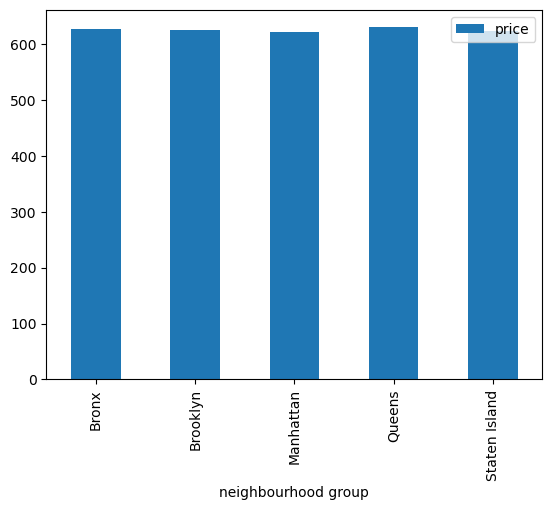

In [25]:
df_groupby.plot.bar( x = 'neighbourhood group', y = 'price')